<a href="https://colab.research.google.com/github/JEMALkedir/Cement/blob/main/strength01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1: Introduction
## 1.1 Background
Compressive strength is a critical performance indicator in cementitious materials, with major implications for structural safety, durability, cost, and sustainability across the construction industry. Predicting compressive strength is of paramount importance because it enables optimized mix design, quality control, and early decision-making before full curing and destructive testing are completed. This capstone project provides an overview of the compressive strength prediction problem and its broader engineering implications. It highlights the critical importance of developing accurate predictive models for compressive strength to support efficient material selection, reduce trial-and-error experimentation, and improve reliability in real-world construction applications.

##1.2 Project Objective
The primary objectives of this comprehensive capstone project are to develop robust predictive models for compressive strength and to gain insights into the key factors influencing strength development in cementitious materials. These models will be instrumental in supporting mix design optimization, improving quality control, and guiding engineers and practitioners in predicting strength performance under varying material compositions and curing conditions. The project aims to contribute to the broader field of construction materials analytics and predictive modeling by enabling faster, more cost-effective, and more reliable decision-making in laboratory research and practical construction applications.

##1.3 Data Overview
This project utilizes a curated dataset of 300 samples collected from recently published research papers (2016–2026), providing a comprehensive resource that captures a wide range of mix design parameters, curing conditions, and measured compressive strength outcomes for cementitious materials. The dataset’s relevance to the project will be discussed by highlighting how the extracted variables represent key factors controlling strength development, and by describing the specific input features and target strength values used for predictive modeling.

#Section 2: Data Preprocessing
## 2.1 Data Cleaning
In this subsection, we will handle missing values in the compressive strength dataset by imputing them with the median of their respective feature columns (for example, cement content, water-to-binder ratio, SCM dosage, curing time, and curing temperature). This approach preserves the overall distribution of each variable while minimizing the influence of outliers and ensuring the dataset is suitable for reliable predictive modeling.

In [51]:
# Import necessary librararies
import pandas as pd
data = pd.read_csv('/content/strength.csv')
df = pd.read_csv('/content/strength.csv')

# rows and columns
print("Shape (rows, cols):", data.shape)

# separate
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

# column names (optional)
print("Columns list:", data.columns.tolist())

Shape (rows, cols): (300, 14)
Rows: 300
Columns: 14
Columns list: ['water', 'Cement', 'Flyash', 'CSC', 'GGBFS', 'limestone', 'Glass powder', 'Metakaolin', 'Silica fume', 'Carbonation day', 'Relative humidity', 'Temperature', 'CO2 (%)', 'Strength']


In [52]:
# chek that missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)


water                0
Cement               0
Flyash               0
CSC                  0
GGBFS                0
limestone            0
Glass powder         0
Metakaolin           0
Silica fume          0
Carbonation day      0
Relative humidity    0
Temperature          0
CO2 (%)              0
Strength             0
dtype: int64


In [53]:
data.head()


,water,Cement,Flyash,CSC,GGBFS,limestone,Glass powder,Metakaolin,Silica fume,Carbonation day,Relative humidity,Temperature,CO2 (%),Strength
0,24.5,70.0,30,0,0,0,0,0.0,0,3,75,25,5,24.5
1,24.5,70.0,30,0,0,0,0,0.0,0,7,75,25,5,30.4
2,24.5,70.0,30,0,0,0,0,0.0,0,14,75,25,5,37.1
3,24.5,70.0,30,0,0,0,0,0.0,0,28,75,25,5,40.2
4,28.0,70.0,20,0,0,0,0,10.0,0,3,55,20,0,19.4


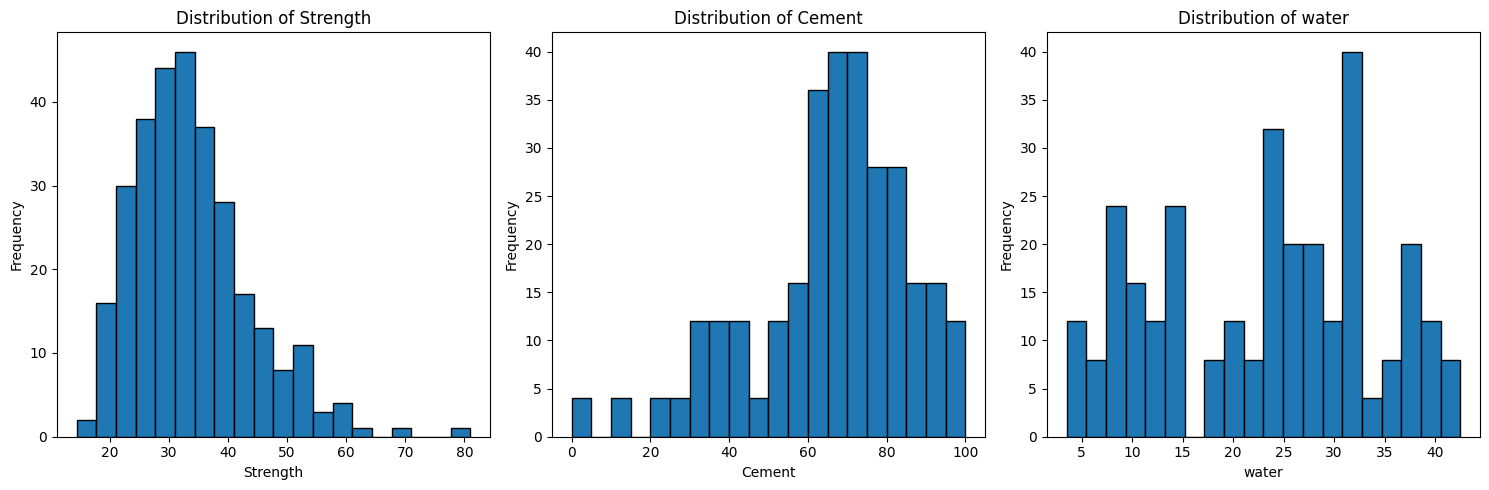

Original number of rows: 300
Number of rows after outlier removal (Strength): 292


In [54]:
import matplotlib.pyplot as plt

# Create histograms for key variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['Strength'], bins=20, edgecolor='k')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.title('Distribution of Strength')

plt.subplot(1, 3, 2)
plt.hist(data['Cement'], bins=20, edgecolor='k')
plt.xlabel('Cement')
plt.ylabel('Frequency')
plt.title('Distribution of Cement')

plt.subplot(1, 3, 3)
plt.hist(data['water'], bins=20, edgecolor='k')
plt.xlabel('water')
plt.ylabel('Frequency')
plt.title('Distribution of water')

plt.tight_layout()
plt.show()

# Identify and handle outliers (using 'Strength' as an example)
Q1 = data['Strength'].quantile(0.25)
Q3 = data['Strength'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Strength'] >= lower_bound) & (data['Strength'] <= upper_bound)]

print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after outlier removal (Strength): {data.shape[0]}")

## 2.2 Data Exploration
For visual exploration, we'll create histograms for key variables, such as 'Glucose.' We'll also identify and handle outliers.

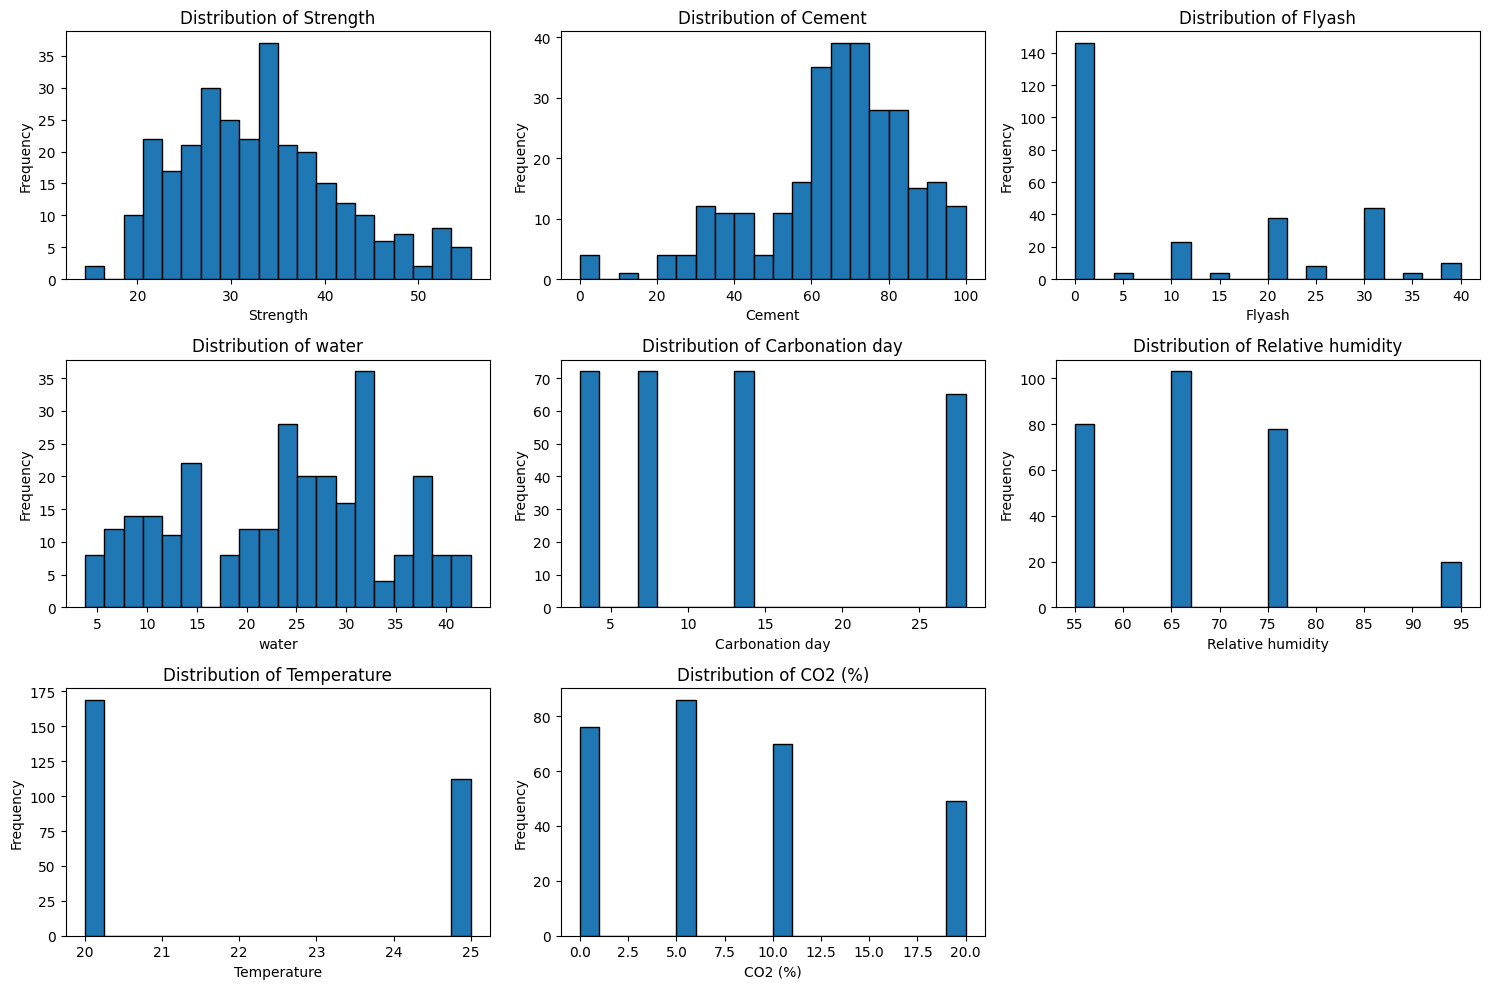

In [55]:
# List of variables to process
variables_to_process = ['Strength', 'Cement', 'Flyash', 'water', 'Carbonation day', 'Relative humidity', 'Temperature', 'CO2 (%)']

# Create histograms for key variables and handle outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_to_process, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[variable], bins=20, edgecolor='k')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable}')
    # Identify and handle outliers for each variable
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

plt.tight_layout()
plt.show()

In [56]:
 from sklearn.preprocessing import StandardScaler
# List of numeric features to scale
#numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunctio
 numeric_features  = ['Strength', 'Cement', 'Flyash', 'water', 'Carbonation day', 'Relative humidity', 'Temperature', 'CO2 (%)']

# Create a StandardScaler object
scaler = StandardScaler()
# Scale all numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])


#Section 3:Exploratory Data Analysis (EDA)
##3.1 Data Distribution Analysis
##3.2 Class Balance Visualization
##3.3 Pair waise Relationships visualization

To visualize pairwise relationships between key variables, you can create a pairplot as follows:

For a more comprehensive understanding of the dataset, we'll create visualizations like pair plots for pairwise relationships and a heatmap
for correlation analysis using Seaborn.

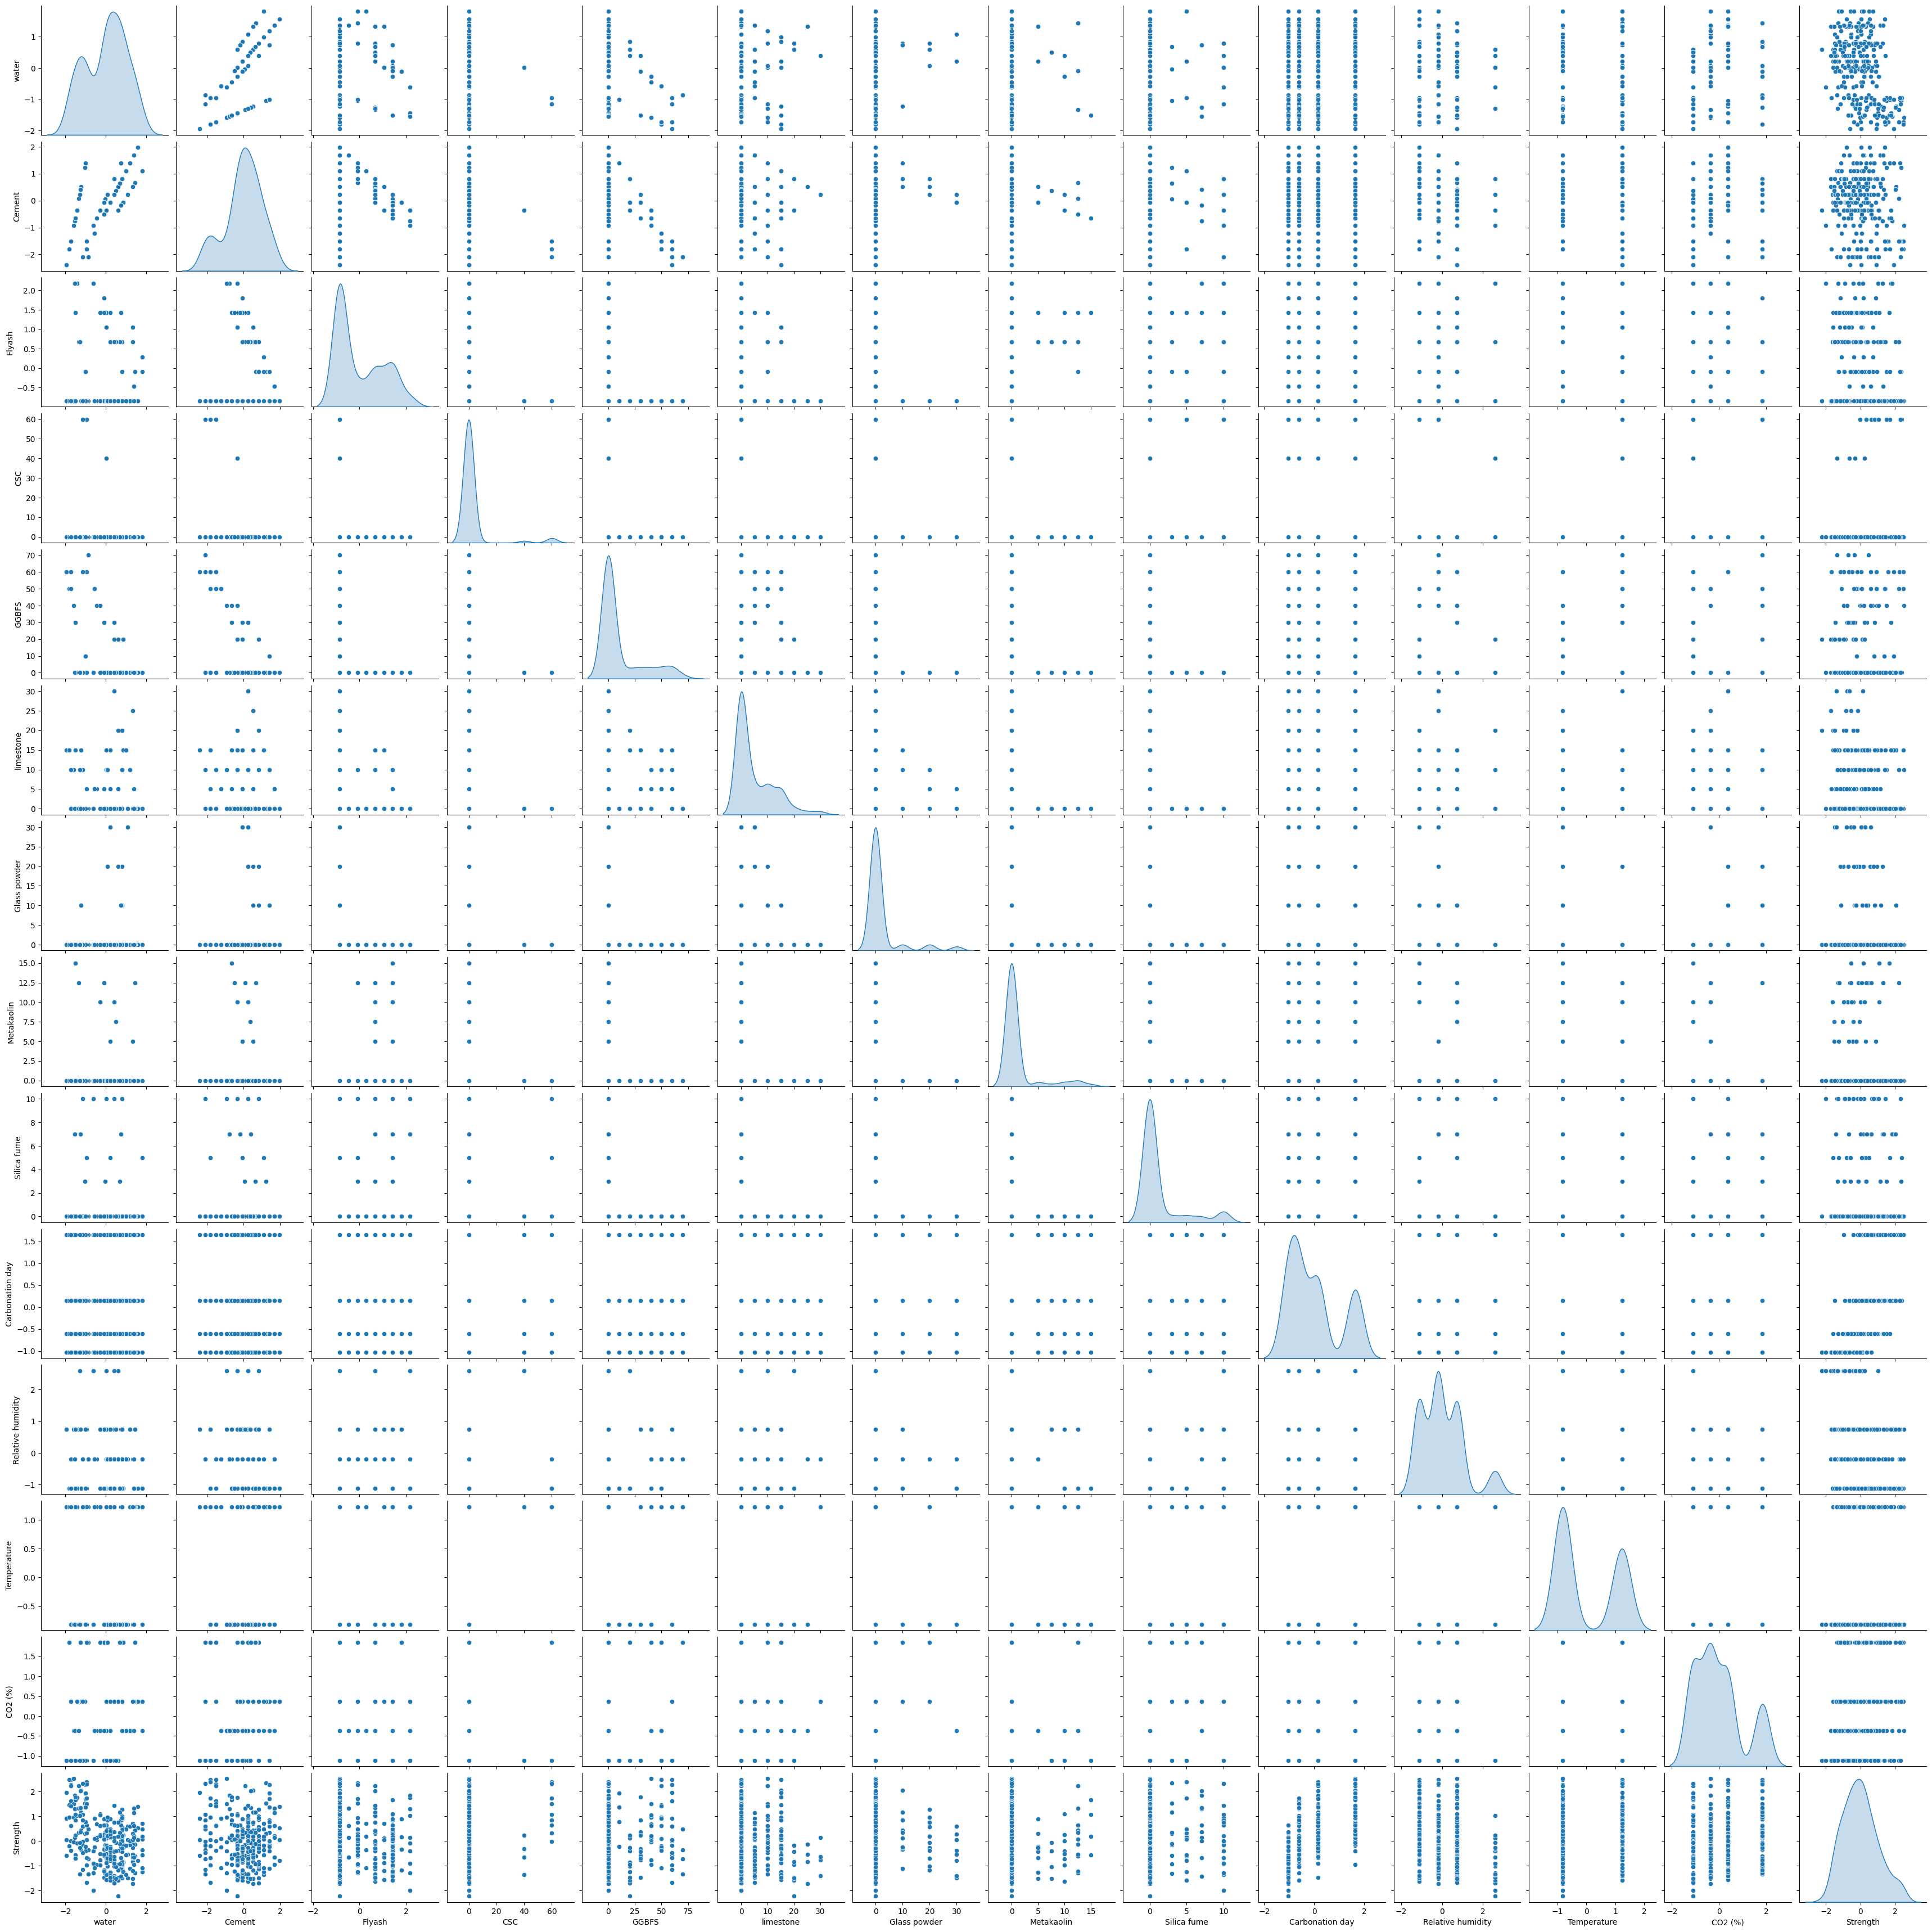

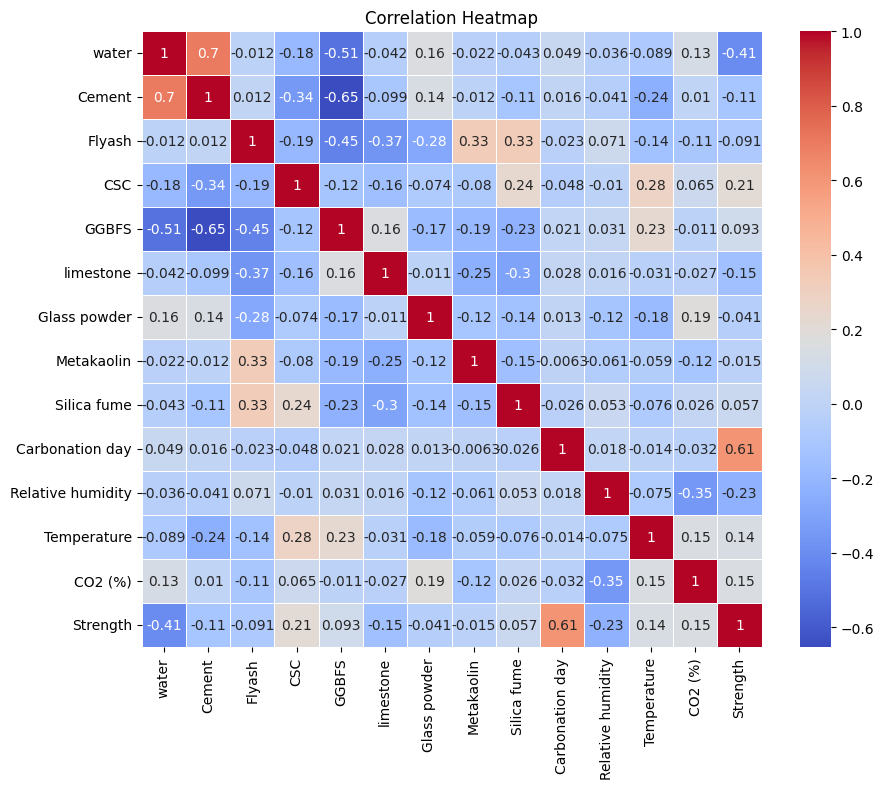

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pairwise relationships using pairplot
sns.pairplot(data, diag_kind='kde')
plt.show()
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [58]:
print(data.columns.tolist())

['water', 'Cement', 'Flyash', 'CSC', 'GGBFS', 'limestone', 'Glass powder', 'Metakaolin', 'Silica fume', 'Carbonation day', 'Relative humidity', 'Temperature', 'CO2 (%)', 'Strength']


# Section 4. Model Development
##4.1.1 Model selection strategy

In this subsection, we will discuss the strategy for selecting the appropriate classification algorithm(s) for predicting diabetes in this project.
Model selection is a crucial step, as different algorithms have different strengths and weaknesses, and the choice should align with the
dataset characteristics and project objectives.
Strategy for Model Selection:
Understand the Problem: Begin by thoroughly understanding the problem you are trying to solve. In this case, we aim to predict whether a
patient has diabetes based on certain diagnostic measurements. It's a binary classification problem.
Explore the Dataset: Examine the dataset's characteristics, including size, feature types, and distribution. Understand the nature of the data
and the relationships between features.
Consider Algorithm Suitability:
Logistic Regression: A simple yet effective algorithm for binary classification. It's a good starting point.
Decision Trees and Random Forests: Useful for capturing complex relationships in the data. Ensemble methods like Random Forests can
improve accuracy.
Support Vector Machines (SVM): Effective when data separation is not linearly separable.
Gradient Boosting (GBM): Powerful for improving model accuracy by boosting weak learners.
Neural Networks: Suitable for complex problems with large datasets but may require more data and computational resources.
K-Nearest Neighbors (KNN): Effective when data points are close to each other in feature space.
Prioritize Interpretability: Consider whether the model needs to be interpretable in a healthcare context. Logistic Regression and Decision
Trees are more interpretable than neural networks, for example.
Evaluate Metrics: Decide on the evaluation metrics that matter most for this problem. Metrics like accuracy, precision, recall, F1-score, and
AUC (ROC curve) should be considered.
Iterative Process: Model selection may involve an iterative process. Start with a simple model, evaluate its performance, and then explore
more complex models if necessary.
Ensemble Methods: Consider using ensemble methods like stacking or boosting to combine the strengths of multiple models.
Resource Constraints: Take into account computational resources and time constraints when selecting models. Some models are more
computationally expensive.
Class Imbalance: we will address class imbalance issues if present in the dataset.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# data = pd.read_csv("your_file.csv")

# Clean column names
data.columns = (
    data.columns.astype(str)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
    .str.replace("%", "pct", regex=False)
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
)

TARGET_COL = "Strength"
X = data.drop(columns=[TARGET_COL])
y = data[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R^2  : {r2:.4f}")
    return y_pred


##4.2 Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

lin_model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

lin_model.fit(X_train, y_train)
y_pred_lin = evaluate_model("Linear Regression", lin_model, X_test, y_test)



Linear Regression
MAE  : 0.3418
RMSE : 0.4508
R^2  : 0.7864


##4.3 Lasso

In [61]:
from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", Lasso(alpha=0.01, max_iter=10000, random_state=42))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = evaluate_model("Lasso Regression", lasso_model, X_test, y_test)



Lasso Regression
MAE  : 0.3466
RMSE : 0.4533
R^2  : 0.7840


##4.3 SVR

In [62]:
from sklearn.svm import SVR

svr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", SVR(kernel="rbf", C=10, epsilon=0.1))
])

svr_model.fit(X_train, y_train)
y_pred_svr = evaluate_model("SVR (RBF)", svr_model, X_test, y_test)



SVR (RBF)
MAE  : 0.2384
RMSE : 0.2930
R^2  : 0.9098


##4.4 RandomForest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=None
)

rf_model.fit(X_train, y_train)
y_pred_rf = evaluate_model("Random Forest", rf_model, X_test, y_test)



Random Forest
MAE  : 0.3691
RMSE : 0.5610
R^2  : 0.6692


##4.5 XGBRegressor

In [64]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = evaluate_model("XGBoost", xgb_model, X_test, y_test)



XGBoost
MAE  : 0.2014
RMSE : 0.2952
R^2  : 0.9084


##4.6 Taylor diagram

A Taylor diagram is a specialized visualization tool used to compare multiple models against a reference observation based on three statistics: Pearson correlation coefficient, root-mean-square error (RMSE), and standard deviation

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_stats(obs, pred):
    obs = np.asarray(obs).ravel()
    pred = np.asarray(pred).ravel()

    obs_c = obs - np.mean(obs)
    pred_c = pred - np.mean(pred)

    std_obs = np.std(obs_c, ddof=1)
    std_pred = np.std(pred_c, ddof=1)

    corr = np.corrcoef(obs, pred)[0, 1]
    corr = np.clip(corr, -1, 1)

    crmsd = np.sqrt(np.mean((pred_c - obs_c) ** 2))
    return std_obs, std_pred, corr, crmsd

def taylor_diagram(obs, model_preds, normalize=True, title="Taylor Diagram"):
    obs = np.asarray(obs).ravel()
    std_obs = np.std(obs - np.mean(obs), ddof=1)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="polar")

    # show only positive correlation region
    ax.set_thetamin(0)
    ax.set_thetamax(90)

    # correlation ticks on angle axis
    corr_ticks = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 1.0])
    theta_ticks = np.degrees(np.arccos(corr_ticks))
    ax.set_thetagrids(theta_ticks, labels=[f"{c:.2f}" for c in corr_ticks])

    # radial limit
    rmax = 2.0 if normalize else (2.0 * std_obs)
    ax.set_rlim(0, rmax)

    # centered RMSE contours
    theta = np.linspace(0, np.pi/2, 300)
    r = np.linspace(0, rmax, 300)
    T, R = np.meshgrid(theta, r)
    rho = np.cos(T)

    if normalize:
        E = np.sqrt(1 + R**2 - 2*R*rho)  # normalized cRMSE
        levels = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
    else:
        E = np.sqrt(std_obs**2 + R**2 - 2*std_obs*R*rho)  # absolute cRMSE
        levels = np.linspace(0.1*std_obs, 1.5*std_obs, 7)

    cs = ax.contour(T, R, E, levels=levels, linewidths=1)
    ax.clabel(cs, inline=True, fontsize=9)

    # reference point
    ref_r = 1.0 if normalize else std_obs
    ax.plot(0, ref_r, "k*", markersize=12, label="Measured (Reference)")

    # models
    for name, pred in model_preds.items():
        _, std_p, corr, _ = taylor_stats(obs, pred)

        rr = (std_p / std_obs) if normalize else std_p
        tt = np.arccos(np.clip(corr, 0, 1))
        ax.plot(tt, rr, "o", markersize=8, label=name)

    ax.set_title(title, pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.35, 1.15))
    plt.tight_layout()
    plt.show()


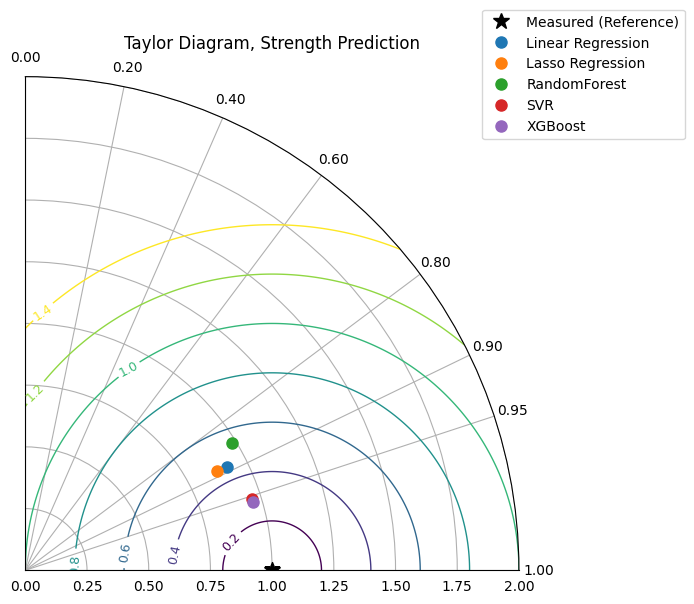

In [67]:
preds = {
    "Linear Regression": y_pred_lin,
    "Lasso Regression": y_pred_lasso,
    "RandomForest": y_pred_rf,
    "SVR": y_pred_svr,
    "XGBoost": y_pred_xgb
}

taylor_diagram(y_test, preds, normalize=True, title="Taylor Diagram, Strength Prediction")



*   **Overall performane**:All models are clustered together, showing similar pattern aggrement with the measured strength.
*   **Correlation**:Most points lie around 0.8 to 0.9, indicaating  a strong( but not perfect) mach with the measured trend.
*   **Variability:** Most models have lower standard deviation than the reference (they are closer to the center than the star), meaning predictions are slightly “smoothed” and do not capture full strength variation.
*   **Best vs weakest**: Random Forest appears closest to the reference overall, while XGBoost looks comparatively weaker in this plot.




